In [1]:
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.utils.validation import check_is_fitted
from category_encoders import OrdinalEncoder, OneHotEncoder

warnings.simplefilter(action="ignore", category=FutureWarning)

In [22]:
# importing file
df = pd.read_csv("C:/Users/chino/OneDrive/Desktop/Data Science Projects/MY DATASETS/archive (1)/car_prediction_data.csv")
df.info()
# df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [23]:
# Drop with low cardinality
df.drop(columns=["Seller_Type", "Transmission", "Owner","Present_Price" ], inplace=True)
df.head()

,Car_Name,Year,Selling_Price,Kms_Driven,Fuel_Type
0,ritz,2014,3.35,27000,Petrol
1,sx4,2013,4.75,43000,Diesel
2,ciaz,2017,7.25,6900,Petrol
3,wagon r,2011,2.85,5200,Petrol
4,swift,2014,4.60,42450,Diesel


In [24]:
# checking for variables with high and low cardinality
df.select_dtypes("object").head()
df.select_dtypes("object").nunique()

Car_Name     98
Fuel_Type     3
dtype: int64

In [25]:
df.select_dtypes("number").head()
df.select_dtypes("number").nunique()

Year              16
Selling_Price    156
Kms_Driven       206
dtype: int64

In [26]:
# creating car_age column
df["car_age"] = 2023 - df["Year"]
df["km_per_year"] = round(df["Kms_Driven"]/df["car_age"], 2)
df.drop(columns =["Year", "Kms_Driven"], inplace=True)
df.head()

,Car_Name,Selling_Price,Fuel_Type,car_age,km_per_year
0,ritz,3.35,Petrol,9,3000.00
1,sx4,4.75,Diesel,10,4300.00
2,ciaz,7.25,Petrol,6,1150.00
3,wagon r,2.85,Petrol,12,433.33
4,swift,4.60,Diesel,9,4716.67


In [27]:
df["Car_Name"].value_counts().head(10)

Car_Name
city             26
corolla altis    16
verna            14
fortuner         11
brio             10
ciaz              9
innova            9
i20               9
grand i10         8
jazz              7
Name: count, dtype: int64

Text(0.5, 1.0, 'MILEAGE')

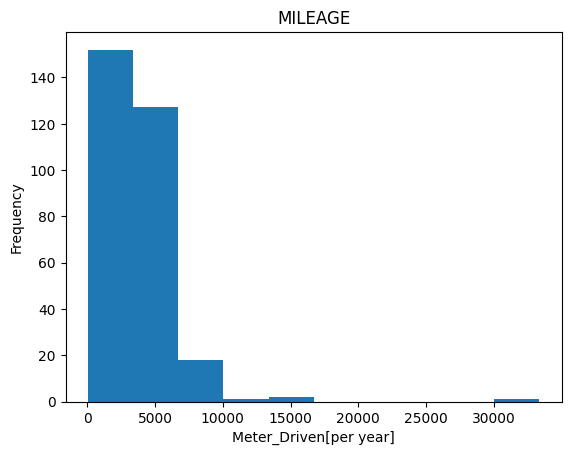

In [28]:
# histogram visualization of 'Kms_Driven'
plt.hist(df["km_per_year"])

# adding x-axis label
plt.xlabel("Meter_Driven[per year]")

# adding y-axis label
plt.ylabel("Frequency")

# adding title
plt.title("MILEAGE")

In [49]:
df.select_dtypes("object").head()

,Car_Name,Fuel_Type
0,ritz,Petrol
1,sx4,Diesel
2,ciaz,Petrol
3,wagon r,Petrol
4,swift,Diesel


<Axes: >

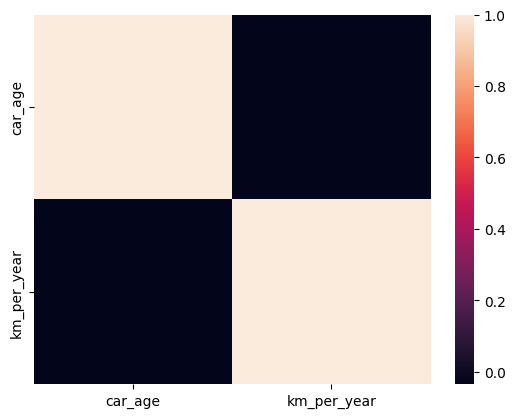

In [29]:
# checking the correlation using heatmap
corr = df.select_dtypes("number").head().drop(columns=["Selling_Price"]).corr()
sns.heatmap(corr)

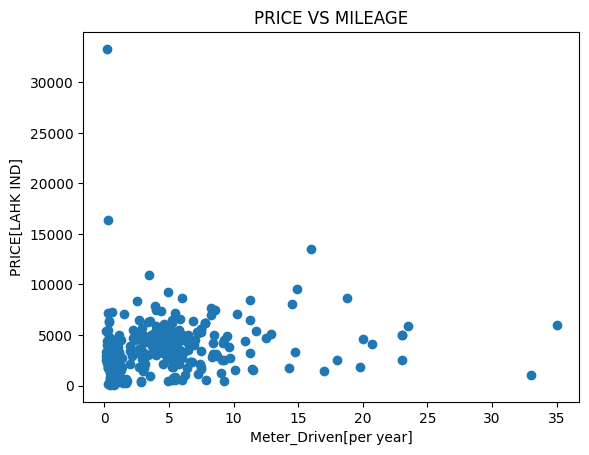

In [30]:
# # checking the correlation using heatmap
# corr = df.select_dtypes("object").head().corr()
# sns.heatmap(corr)

plt.scatter(x=df["Selling_Price"], y=df["km_per_year"])

# x-axis label
plt.xlabel("Meter_Driven[per year]")

# adding y-axis label
plt.ylabel("PRICE[LAHK IND]")

plt.title("PRICE VS MILEAGE");



SPLIT DATASET

In [51]:
#feature_matrix
X = df.drop(columns=["Selling_Price"], axis=1)
# target_vector
y = df["Selling_Price"]

# split dataset(80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ENCODING CATEGORICAL VARIABLE

In [52]:
# instantiate encoder
ohe = OneHotEncoder(use_cat_names=True)
# fit X_train to encoder
ohe.fit(X_train)

# transform
XT_train = ohe.transform(X_train)
# XT_train.head()
# XT_train.info()
XT_train.shape

(240, 93)

BUILT A BASELINE MODEL

In [53]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean]* len(y_train)
# y_pred_baseline[:5]
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
# mae baseline
print("Mean Car price:", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean Car price: 4.64
Baseline MAE: 3.45


In [54]:
# plt.plot(X_train, y_pred_baseline, color="orange", label="Baseline Model")
# plt.scatter(X_train, y_pred_baseline)
# plt.xlabel("Actual Selling Price")
# plt.ylabel("Baseline Predicted Price")
# plt.title("Baseline Model: Predicting Mean Selling Price")
# plt.legend()
# plt.show()

MADE PIPELINE AND TRAINED MY MODEL WITH BIG X AND SMALL Y

In [55]:
model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    LinearRegression(),
)
model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Car_Name', 'Fuel_Type'],
                               use_cat_names=True)),
                ('linearregression', LinearRegression())])

In [56]:
# testing model
y_pred_test = pd.Series(model.predict(X_test))
y_pred_test.head()

0    4.924690
1    8.979159
2    5.127008
3   -0.636556
4    7.790521
dtype: float64

In [57]:
mae_model = mean_absolute_error(y_test, y_pred_test)
print("Model MAE:", round(mae_model, 2))


Model MAE: 1.73


Communicaating Results

In [58]:
# finding the intercept
intercept = model.named_steps["linearregression"].intercept_.round()
coefficients = model.named_steps["linearregression"].coef_.round()
print("coefficients len:", len(coefficients))
print(coefficients[:5])

coefficients len: 93
[ 1. -5.  2.  1. -2.]


In [59]:
feature_names = model.named_steps["onehotencoder"].get_feature_names()
print("features len:", len(feature_names))
print(feature_names[:5])

features len: 93
['Car_Name_Bajaj Pulsar 150' 'Car_Name_Bajaj Avenger 220'
 'Car_Name_Hero  CBZ Xtreme' 'Car_Name_etios g'
 'Car_Name_Royal Enfield Thunder 350']


In [60]:
feat_imp = pd.Series(coefficients, index=feature_names)
feat_imp.head()

Car_Name_Bajaj Pulsar 150             1.0
Car_Name_Bajaj Avenger 220           -5.0
Car_Name_Hero  CBZ Xtreme             2.0
Car_Name_etios g                      1.0
Car_Name_Royal Enfield Thunder 350   -2.0
dtype: float64

Text(0.5, 1.0, 'Feature Importance for Car Price')

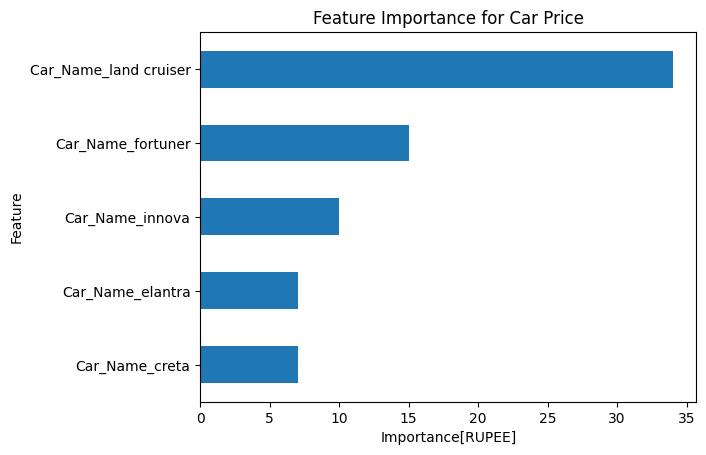

In [62]:
feat_imp.sort_values(key=abs).tail().plot(kind="barh")
plt.xlabel("Importance[RUPEE]")
plt.ylabel("Feature")
plt.title("Feature Importance for Car Price");

Text(0.5, 1.0, 'Feature Importance for Car Price')

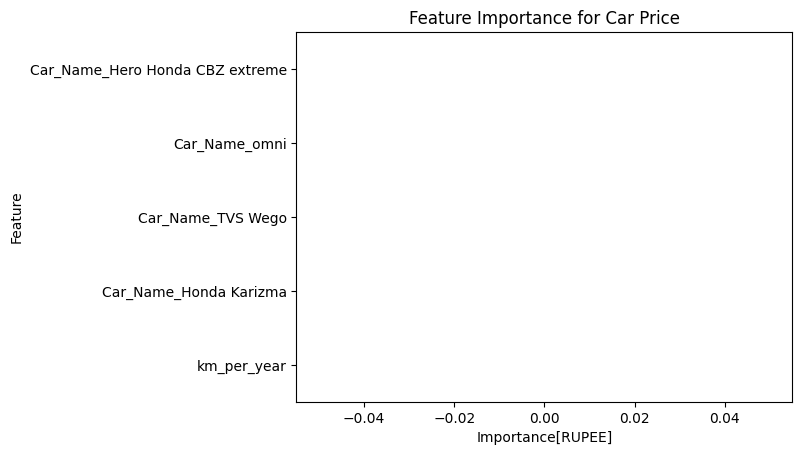

In [63]:
feat_imp.sort_values(key=abs).head().plot(kind="barh")
plt.xlabel("Importance[RUPEE]")
plt.ylabel("Feature")
plt.title("Feature Importance for Car Price");